### [문자열 압축](https://school.programmers.co.kr/learn/courses/30/lessons/60057)

In [15]:
def solution(s):
    LEN = len(s)
    answer = LEN
    for i in range(1, LEN+1):
        n_s = ''
        string, cnt = s[:i], 1
        share = LEN//i
        for j in range(1, share+1):
            next_string = s[j*i:j*i+i]
            if string == next_string:
                cnt += 1
            else :
                n_s += f'{cnt}{string}' if cnt > 1 else f'{string}'
                string = next_string
                cnt = 1
                if j == share:
                    n_s += next_string
        
        n_s += s[j*i+i:]
        n_len = len(n_s)
        print(f'{i=}, {n_s=}, {n_len=}')
        if n_len < answer:
            answer = n_len
            
    return answer

In [16]:
s = 'abcabcdede'
solution(s)

i=1, n_s='abcabcdede', n_len=10
i=2, n_s='abcabc2de', n_len=9
i=3, n_s='2abcdede', n_len=8
i=4, n_s='abcabcdede', n_len=10
i=5, n_s='abcabcdede', n_len=10
i=6, n_s='abcabcdede', n_len=10
i=7, n_s='abcabcdede', n_len=10
i=8, n_s='abcabcdede', n_len=10
i=9, n_s='abcabcdede', n_len=10
i=10, n_s='abcabcdede', n_len=10


8

- 다른 풀이  
  list comprehension을 이용해 각 반복 과정을 연산하는 걸 최적화

In [ ]:
def compress(text, tok_len):
    words = [text[i:i+tok_len] for i in range(0, len(text), tok_len)]
    res = []
    cur_word = words[0]
    cur_cnt = 1
    for a, b in zip(words, words[1:] + ['']):
        if a == b:
            cur_cnt += 1
        else:
            res.append([cur_word, cur_cnt])
            cur_word = b
            cur_cnt = 1
    return sum(len(word) + (len(str(cnt)) if cnt > 1 else 0) for word, cnt in res)

def solution(text):
    return min(compress(text, tok_len) for tok_len in list(range(1, int(len(text)/2) + 1)) + [len(text)])


### [점 찍기](https://school.programmers.co.kr/learn/courses/30/lessons/140107?language=python3)

- 유클리드 거리를 이용해 원점에서의 거리를 계산에서 세기  
- point는 이중 반복문을 사용하는 것이 아니라, 제시된 최대 거리에서 하나의 축의 거리를 빼고,  
  남은 거리에서 가능한 최대 숫자를 구현하는 것  
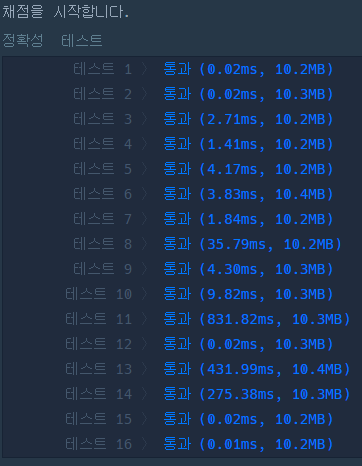

In [3]:
def solution(k, d):
    answer = 0
    max_len = d // k
    for i in range(max_len+1):
        x = i * k
        extra = int((d**2 - x**2)**0.5 / k)
        
        answer += extra + 1 # 원점을 포함해서 더하기
        
    return answer


In [12]:
k = 2
d = 4
solution(k, d)

answer=8, i=2, j=1
answer=7, i=2, j=0
answer=6, i=1, j=1


6

### [후보키]()

In [109]:
from itertools import combinations, permutations

def solution(relation):
    target = len(relation)
    
    candis = [str(e) for e, x in enumerate(zip(*relation)) if len(set(x)) == target]
    answer = len(candis)
    
    relation = [x for x in zip(*relation) if len(set(x)) != len(relation)]    
    c = 1
    used_pattern = []
    while c <= len(relation):
        c += 1
        idx_list = [x for x in range(len(relation))]
        # 가능한 패턴
        combis = ["".join(list(map(str, x))) for x in list(combinations(idx_list, c))]
        # 이미 사용된 조합을 포함하는지 확인
        combis = [item for item in combis if not any(sub in item for sub in used_pattern)]
        
        for combi in combis:
            new_relation = relation[int(combi[0])]
            for comb in combi[1:]:
                new_relation = [x+y for x, y in list(zip(new_relation, relation[int(comb)]))]
                
            if len(set(new_relation)) == target:
                all_pattern = ["".join(list(x)) for x in list(permutations(combi, len(combi)))]
                used_pattern += all_pattern
                answer += 1
                
    print(f'{answer=}, {used_pattern=}')

In [110]:
relation = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]
solution(relation)

answer=2, used_pattern=['01', '10']


In [79]:
any(['01', '02', '12'] not in '012')

TypeError: 'in <string>' requires string as left operand, not list

In [55]:
t = [(0, 1), (0, 2), (1, 2)]
t

[(0, 1), (0, 2), (1, 2)]

In [59]:
v = (0, 1)
list(v)

[0, 1]

In [62]:
[list(x) for x in t]

[[0, 1], [0, 2], [1, 2]]

In [65]:
k = [0, 1]
"".join(map(lambda x: str(k)))

TypeError: map() must have at least two arguments.

In [31]:
'01' in '012'

True

In [27]:
from itertools import combinations

del_idx = []
c = 2
relation = [["ryan","apeach","tube","con","muzi","apeach"],["music","math","computer","computer","music","music"],["2","2","3","4","3","2"]]
idx_list = [x for x in range(len(relation))]
combis = list(combinations(idx_list, c))
for combi in combis:
    new_relation = relation[combi[0]]
    for comb in combi[1:]:
        new_relation = [x+y for x, y in list(zip(new_relation, relation[comb]))]
        print(new_relation)
    if len(set(new_relation)):
        del_idx += combi
        


['ryanmusic', 'apeachmath', 'tubecomputer', 'concomputer', 'muzimusic', 'apeachmusic']
['ryan2', 'apeach2', 'tube3', 'con4', 'muzi3', 'apeach2']
['music2', 'math2', 'computer3', 'computer4', 'music3', 'music2']


In [1]:
a = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]

In [6]:
[x for x in zip(*a) if len(set(x)) == len(a)]

[('100', '200', '300', '400', '500', '600')]